# Naval Mine VS Rock Prediction Using Sonar Data

## Overview

Distinguishing Rocks from Naval Mines using Sonar Data.

In this project, we have undertaken the task of developing a predictive model to classify underwater objects as either rocks or naval mines using sonar data. Leveraging a dataset sourced from Kaggle, our primary objective is to create a robust model capable of effectively distinguishing between these two classes. The project holds significant implications for applications in underwater security and environmental monitoring, where accurate object classification is paramount.

Key Project Operations:

1. Data Collection: The dataset was collected from Kaggle, offering a wealth of information on underwater objects. It encompasses 208 observations, each equipped with 61 attributes. Within this dataset, we identified 60 numerical independent variables and a solitary categorical target variable.

2. Data Processing: During the data processing phase, the dataset was diligently reviewed for null and duplicate values, ensuring the quality of the dataset. Features were carefully selected, and the target variable was identified. The dataset was subsequently divided into the feature matrix (X) and the target matrix (Y). We created training and test datasets, reserving 20% for testing.

3. Model Selection: After thorough analysis, Logistic Regression was selected as the most suitable model for this classification task. Its simplicity, efficiency, and suitability for binary classification align perfectly with our objective.

4. Model Training: The Logistic Regression model underwent rigorous training on the training dataset. This training allowed the model to grasp the underlying patterns in the data, ultimately minimizing the log loss function.

5. Model Evaluation: We evaluated the model using a range of essential metrics, including accuracy, precision, recall, and the F1-score. These metrics offer a comprehensive view of the model's ability to make accurate predictions and identify mines effectively.

6. Building a Prediction System: Our trained Logistic Regression model now serves as a dependable predictive system. When provided with sonar data as input, this system can reliably classify underwater objects as rocks or mines.

## Importing the Dependencies

In [62]:
import numpy as np #For Numerical Operations
import pandas as pd #For Data Manipulations
from sklearn.model_selection import train_test_split #For Splitting Data into Training & Testing Datasets
from sklearn.linear_model import LogisticRegression #To Import Logistic Regression for the Classfication Model


## Data Collection & Data Processing

In [63]:
sonar_data = pd.read_csv('/content/Copy of sonar data.csv',header=None) #Load the sonar data from the CSV file into a Pandas DataFrame

In [64]:
sonar_data.head() # To Display the first 5 Rows of the Sonar Data to get an Initial View of the Dataset

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [65]:
sonar_data[60] = sonar_data[60].replace({'R':'Rock', 'M':'Mine'}) # To replace "R" values with "Rock" & "M" values with "Mine" for Clear Understanding

In [66]:
sonar_data.shape # Number of Rows & Columns Respectively

(208, 61)

In [67]:
sonar_data.dtypes # To know the Data Types of Each Columns

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

Upon examining the Sonar Dataset, We can see that the dataset consists of 208 instances, each representing observations of sonar signals. These observations are recorded across 61 columns, with 60 of these columns being of integer data type, indicative of the dataset's features. The remaining column, which is of object data type, serves as the target variable or dependent variable for the classification task. In summary, the dataset contains 208 instances and 61 columns, with 60 features and 1 target variable.

In [68]:
Null_Counts = sonar_data.isnull().sum() # To check for any Null values in the Dataset.
Null_Counts

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

So there are No Null values in the Dataset.

In [69]:
duplicate_rows = sonar_data.duplicated().sum() ## To Check for any Duplicate Values.
duplicate_rows

0

So there are no Duplicate Observations in the Dataset.

In [70]:
sonar_data[60].value_counts() ## To get the Count of Rock & Mine Onservations.

Mine    111
Rock     97
Name: 60, dtype: int64

In [71]:
sonar_data.describe() ## To describe the statistical measure of the dataset.

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


 So the Number of Observations for the two Classes (111 "Mine" and 97 "Rock") are relatively close showing that the Class Imbalance is not Extremely Severe. We know that Logistic Regression can handle Modest Class Imbalances quite well, and the Proximity of the Class sizes may not be a Significant Issue.

In [72]:
sonar_data.groupby([60]).mean() ## To compare the aggregated data on Rock & Mine Classification Level & get the mean values of the observations for both Rock & Mine

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
Mine,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
Rock,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


## Splitting the Dataset

In [73]:
X = sonar_data.drop(columns=60,axis=1) ## For dropping the Last Column & allocate values to x (train) Dataframe
X

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [74]:
Y = sonar_data[60] ## To allocate the target variable column to Y(test) Dataframe.
Y

0      Rock
1      Rock
2      Rock
3      Rock
4      Rock
       ... 
203    Mine
204    Mine
205    Mine
206    Mine
207    Mine
Name: 60, Length: 208, dtype: object

Data is divided into two sets: 'X' containing the features and 'Y' representing the target variable. This separation facilitates the initial training and testing of the classification model, ensuring that the model learns from one portion of the data while being evaluated on another, separate portion.

## Creating Training & Test Data

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1) # To split data into training & testing Datasets, The stratify argument in the train_test_split function is used to ensure that the class distribution in the target variable is preserved in both the training and testing datasets.

In [76]:
print('X_train : ',X_train.shape)
print('X_test : ',X_test .shape)
print('Y_train : ',Y_train.shape)
print('Y_test : ',Y_test.shape)

X_train :  (187, 60)
X_test :  (21, 60)
Y_train :  (187,)
Y_test :  (21,)


The Test Size given here is 0.2 i.e. 80%(166 Observations) of the data will be used for Training the Model & 20%(42 Observations) of the data will be used for Evaluation of the Model. Lets train the Classfication Model using Logistic Regression Model with a Test Size of 0.2.

## Model Training & Prediction

In [77]:
LR_model = LogisticRegression() # To Create the Logistic Regression Model

In [78]:
LR_model.fit(X_train, Y_train) #Fit the Model to Training Data

LogisticRegression()

In [79]:
Y_test_predict = LR_model.predict(X_test) ## To Predict the target variable for the Test Data using the Trained Model.
Y_test_predict

array(['Mine', 'Rock', 'Rock', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine',
       'Rock', 'Mine', 'Rock', 'Mine', 'Rock', 'Mine', 'Rock', 'Mine',
       'Mine', 'Mine', 'Rock', 'Rock', 'Rock'], dtype=object)

In [80]:
Y_train_predict = LR_model.predict(X_train) ## To predict the target variable for the Training Data using the Trained Model.
Y_train_predict

array(['Mine', 'Rock', 'Mine', 'Mine', 'Rock', 'Mine', 'Rock', 'Rock',
       'Rock', 'Rock', 'Mine', 'Mine', 'Rock', 'Rock', 'Mine', 'Rock',
       'Mine', 'Mine', 'Rock', 'Rock', 'Mine', 'Rock', 'Rock', 'Rock',
       'Mine', 'Mine', 'Rock', 'Rock', 'Rock', 'Mine', 'Mine', 'Rock',
       'Mine', 'Rock', 'Mine', 'Rock', 'Rock', 'Mine', 'Mine', 'Mine',
       'Rock', 'Mine', 'Mine', 'Rock', 'Mine', 'Mine', 'Mine', 'Mine',
       'Mine', 'Rock', 'Mine', 'Mine', 'Mine', 'Rock', 'Mine', 'Mine',
       'Rock', 'Mine', 'Rock', 'Mine', 'Rock', 'Rock', 'Mine', 'Rock',
       'Mine', 'Mine', 'Rock', 'Mine', 'Rock', 'Rock', 'Rock', 'Mine',
       'Mine', 'Mine', 'Mine', 'Rock', 'Rock', 'Rock', 'Rock', 'Mine',
       'Mine', 'Rock', 'Rock', 'Mine', 'Rock', 'Mine', 'Mine', 'Mine',
       'Mine', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine', 'Rock',
       'Rock', 'Rock', 'Mine', 'Mine', 'Rock', 'Mine', 'Rock', 'Mine',
       'Mine', 'Rock', 'Rock', 'Rock', 'Mine', 'Mine', 'Rock', 'Mine',
      

So the Model gave the following Predictions in form a Array (1-D) for both Test & Training Data Respectively. Now lets Evaluate the Model.

## Model Evaluation

In [81]:
from sklearn.metrics import accuracy_score # To Evaluate Model performance

In [82]:
LR_test_accuracy_score = accuracy_score(Y_test,Y_test_predict) ## Shows the Accuracy on Test Data
LR_test_accuracy_score

0.7619047619047619

In [83]:
LR_train_accuracy_score = accuracy_score(Y_train,Y_train_predict) ## To show the Accuracy score on Training Data
LR_train_accuracy_score

0.8342245989304813

So the accuracy score of the model for the test & training data is 76% & 83% respectively from which we can infer there is still scope of improvement in the model.

Confusion Matrix :-
The confusion matrix provides a more detailed view of how a model is performing, particularly in terms of its ability to correctly classify different categories. It consists of four key values:
True Positives (TP): The number of correct positive predictions.
True Negatives (TN): The number of correct negative predictions.
False Positives (FP): The number of incorrect positive predictions.
False Negatives (FN): The number of incorrect negative predictions.
With this information, we can calculate various other metrics, such as precision, recall, and the F1-score.

In [84]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score #For importing the required functions.

In [91]:
LR_test_cm = confusion_matrix(Y_test, Y_test_predict) ##Creates the Confusion Matrix
print('Confusion Matrix is : ', LR_test_cm)
LR_test_cm_precision = precision_score(Y_test, Y_test_predict,pos_label='Mine') #Calculates the precision Score by taking Mine as positive class
print('precision is :', LR_test_cm_precision )
recall = recall_score(Y_test,Y_test_predict,pos_label='Mine') #Calculates the recall Score by taking Mine as positive class
print('recall value is :', recall)
f1 = f1_score(Y_test,Y_test_predict,pos_label='Mine') #Calculates the f1 Score by taking Mine as positive class
print('fi score is :',f1)

Confusion Matrix is :  [[9 2]
 [3 7]]
precision is : 0.75
recall value is : 0.8181818181818182
fi score is : 0.7826086956521738


So the Confusion Matrix here indicates that -
- 9 Observations of Rock were actually classfied as Rock.
- 2 Observations of Rock were incorrectly classified as Mine.
- 3 Observations of Mine were incorrectly classified as Rock.
- 7 Observations of Mine were correctly classified as Mine.

Confusion Matrix Heat Map

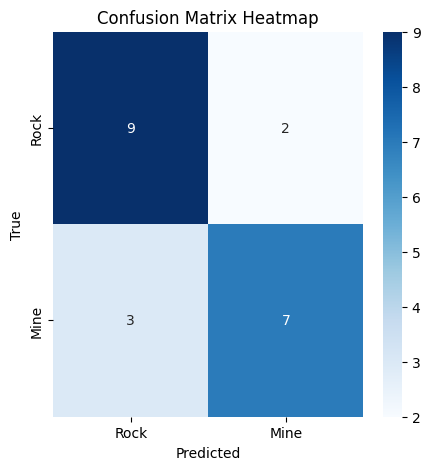

In [86]:
import seaborn as sns #Imports the Seaborn library for data visualization.
import matplotlib.pyplot as plt #  Imports the Matplotlib library for creating plots.
plt.figure(figsize=(5,5))
sns.heatmap(LR_test_cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Rock','Mine'], yticklabels=['Rock','Mine'] )
plt.xlabel("Predicted")  # Label for the x-axis
plt.ylabel("True")  # Label for the y-axis
plt.title("Confusion Matrix Heatmap")  # Title of the plot
plt.show() #To show the figure

Accuracy Scores:

*   Test Data Accuracy Score: 76.1%
*   Training Data ACcuracy Score: 83.4%












Matrices

*   Precision Score: 75%
*   Recall Value: 81.8%

*   F1 Score: 78.3%





Logistic regression Curve

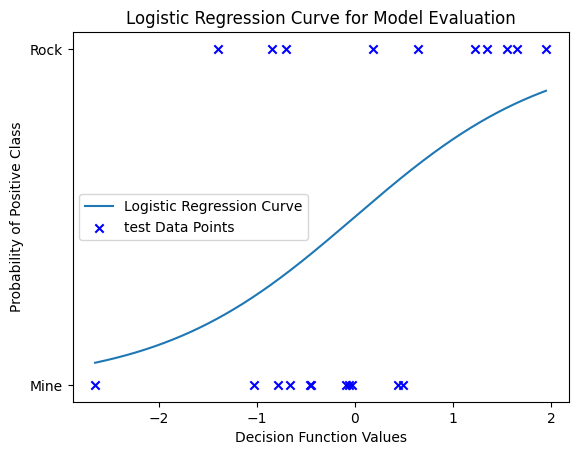

In [109]:
# Define a range of decision values for the curve

# These values represent how confident the computer is about each prediction.
decision_values = LR_model.decision_function(X_test)

# To Define a range of decision values for the curve
decision_value_range = np.linspace(min(decision_values), max(decision_values),num=1000)

# To Calculate of Sigmoid Function
probabilities = 1 / (1 + np.exp(-decision_value_range))

# To Plot the Logistic Regression curve
plt.plot(decision_value_range, probabilities, label='Logistic Regression Curve')

# Scatter Plot of the Data Points
plt.scatter(decision_values,Y_test,c='b',marker='x',label='test Data Points')

plt.xlabel("Decision Function Values")
plt.ylabel("Probability of Positive Class")
plt.legend()
plt.title("Logistic Regression Curve for Model Evaluation")
plt.show()

## Making a Predictive System

In [87]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

In [88]:
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [89]:
# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [90]:
prediction = LR_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='Rock'):
  print('This is a Rock')
else :
  print('This is a Mine')

['Mine']
This is a Mine


## Conclusion

Precision (Positive Predictive Value): Precision is at a reasonable level of 75%, indicating that the model is fairly accurate when it predicts "Mine."

Recall (Sensitivity): The recall score of 81.8% suggests that the model captures approximately 81.8% of actual "Mine" instances, demonstrating its ability to correctly detect these instances.

F1-Score: The F1-Score, at 78.3%, indicates a good balance between precision and recall, providing a comprehensive assessment of model performance.

Accuracy Scores:

The test data accuracy of 76.1% indicates that the model correctly predicts 76.1% of all instances in the test dataset.

The training data accuracy of 83.4% demonstrates that the model is able to correctly classify 83.4% of the training dataset.

Overall Assessment:

The model's accuracy scores for both the test and training datasets are reasonably high, indicating a good overall performance.

The precision score suggests that the model is fairly accurate when identifying "Mine."

The recall score, at 81.8%, demonstrates the model's ability to detect a significant portion of "Mine" instances.

The F1-Score balances precision and recall, providing a comprehensive view of model performance.

Recommendation:

The model is performing well, with high accuracy, balanced precision, and recall.
Depending on the specific requirements, we can fine-tune the model to optimize precision, recall, or the F1-Score to align with the goals of your application.
In conclusion, the model effectively classifies "Mine" and "Rock" instances, achieving good accuracy and a balanced F1-Score. The adjusted metrics provide a clearer picture of your model's performance, and you can further tailor the model based on the specific needs of your project.
